# Pandas

Sigamos con Pandas.

## Valores faltantes

Vimos que por lo general en los datasets tienen datos faltantes. Datos faltantes puede haber por muchas razones (errores, no tenemos el dato, perdimos el dato, etc).

Muchas veces, necesitamos completar estos valores faltantes con alguna aproximación que no altere nuestros resultados.

Existen muchas formas de imputar valores a datos faltantes:

- Podemos usar la media o mediana (imputación univariante)
- Podemos usar un valor fijo (imputación univariante)
- Podemos descartar la fila con datos faltantes (observar que descartar sin ningún criterio puede hacer que perdamos muchos datos)
- Podemos completar el valor faltante en función de los valores de otras columnas (imputación multivariante)

Tenemos que tener en cuenta que siempre es importante entender el problema. En datascience vamos a ver que muchas decisiones que tomemos DEPENDEN DEL PROBLEMA y son muy importantes ya que pueden alterar nuestros resultados finales.

En esta clase, vamos a trabajar con un dataset de review de vinos.

Lo podemos descargar en: https://www.kaggle.com/zynicide/wine-reviews/ (nos tenemos que registrar)

Si usan colab, recuerden subir el csv a drive y montar drive para poder leerlo con pandas.

In [89]:
import numpy as np
import pandas as pd

In [90]:
wine_reviews_df = pd.read_csv('winemag-data_first150k.csv')

Exploremos un poco el dataset.

Imprimimos las primeras 5 filas:

In [91]:
wine_reviews_df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


¿ Cuántas filas tiene el dataset? ¿ Y cuántas columnas ?

Esta pregunta, podemos responderla utilizando `shape`



In [92]:
wine_reviews_df.shape

(150930, 11)

Vemos que el dataset tiene 150930 filas y 11 columnas.

¿ Cuántos valores faltantes tiene el dataset en cada columna ?

In [93]:
wine_reviews_df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

Ahora, ¿Qué hacemos con los faltantes?

Pandas tiene el método .fillna() para imputar valores faltantes y el método .dropna() para eliminar filas con valores faltantes.

Veamos un poco de documentación:

In [94]:
help(pd.DataFrame.dropna)

Help on function dropna in module pandas.core.frame:

dropna(self, *, axis: 'Axis' = 0, how: 'AnyAll | lib.NoDefault' = <no_default>, thresh: 'int | lib.NoDefault' = <no_default>, subset: 'IndexLabel | None' = None, inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If a

In [95]:
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.generic:

fillna(self, value: 'Hashable | Mapping | Series | DataFrame | None' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool_t' = False, limit: 'int | None' = None, downcast: 'dict | None | lib.NoDefault' = <no_default>) -> 'Self | None'
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series:
    
        * ffill: propagate last valid observation forward to next valid.
        * backfill / bfill: use

Ahora, para no modificar nuestro dataset original, lo vamos a clonar

In [96]:
df = wine_reviews_df.copy()

Ahora vamos a trabajar sobre df.

In [97]:
df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


Vemos que las columnas que tienen datos faltantes son designation, price, region_1 y region_2.

Por ahora, como solo estamos aprendiendo Pandas, no vamos a explorar mucho los datos para tomar decisiones. Simplemente vamos a aprender como se usa pandas. En próximas clases vamos a empezar a explorar los datos con mas detalle para tomar buenas decisiones.

Empecemos con el método fillna:

Vamos a imputar los valores faltantes de la columna "price" con la media de la columna.

In [99]:
mean_price = round(df['price'].mean(),2)
mean_price = df['price'].mean().round(2)
mean_price

33.13

In [100]:
df['price'].fillna(mean_price)

0         235.0
1         110.0
2          90.0
3          65.0
4          66.0
          ...  
150925     20.0
150926     27.0
150927     20.0
150928     52.0
150929     15.0
Name: price, Length: 150930, dtype: float64

In [101]:
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price)

Verificamos que no haya más nulos

In [102]:
df.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price              0
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

Vemos que ahora hay 0 null values en la columna price

Ahora, completemos las columnas "designation", "region_1" y "region_2" con el valor por defecto: "dato faltante".

Podemos hacerlo pasandole un diccionario como parametro:

In [103]:
default_value = "dato faltante"
df = df.fillna({'designation': default_value, "region_1": default_value, "region_2": default_value})

In [104]:
df.isna().sum()

Unnamed: 0     0
country        5
description    0
designation    0
points         0
price          0
province       5
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

Ahora nos queda la columna country. En este caso, lo que vamos a hacer es descartar las filas que tengan valores faltantes en esta columna.

Para esto, vamos a usar el método dropna() y vamos a pasarle el parámetro axis=0

Veamos cuantas filas tiene el dataset antes de borrar nulos:

In [105]:
df.shape[0]

150930

Borramos nulos:

In [106]:
df = df.dropna(axis=0)

Y ahora debería haber 5 filas menos:

In [107]:
df.shape[0]

150925

In [108]:
df.isna().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
variety        0
winery         0
dtype: int64

## Filtro por máscara

Vimos que en numpy podemos utilizar filtros. En pandas también podemos hacerlo y es algo que vamos utilizar mucho asique es importante aprender a usarlo bien!

Los filtros se utilizan igual que en numpy.

Seleccionemos todas las filas en las que country sea = 'US'

In [109]:
df[df['country'] == 'US']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...,...
150892,150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,150896,US,"Some raspberry fruit in the aroma, but things ...",dato faltante,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


## Correlación

Pandas nos provee una función para medir la correlación entre variables numéricas

In [110]:
df[['points', 'price']].corr()

,points,price
points,1.00000,0.43841
price,0.43841,1.00000


In [111]:
help(pd.DataFrame.corr)

Help on function corr in module pandas.core.frame:

corr(self, method: 'CorrelationMethod' = 'pearson', min_periods: 'int' = 1, numeric_only: 'bool' = False) -> 'DataFrame'
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correlation.
    numeric_only :

#### Ejercicio

Investigar las funciones:
- value_counts
- unique
- nunique
- max
- min
- sort_values

Responder las siguientes preguntas utilizando lo que sabemos de pandas + lo que investigamos de las funciones de arriba (con la menor cantidad de funciones posibles):

a) ¿ Qúe valores distintos (únicos) hay en la columna country ?

b) ¿ Cuántos valores distintos hay en la columna country ?

c) ¿ Con qué frecuencia (cuantas veces) aparece cada uno de los paises ?

d) ¿ Cuál es el valor máximo de la columna price ?

e) ¿ Cuál es el valor mínimo de la columna price ?

f) ¿ Cuál es el vino más caro ?

g) ¿ Cuántos vinos tienen un precio por encima de la media ?


In [112]:
help(pd.DataFrame.value_counts) 

Help on function value_counts in module pandas.core.frame:

value_counts(self, subset: 'IndexLabel | None' = None, normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, dropna: 'bool' = True) -> 'Series'
    Return a Series containing the frequency of each distinct row in the Dataframe.
    
    Parameters
    ----------
    subset : label or list of labels, optional
        Columns to use when counting unique combinations.
    normalize : bool, default False
        Return proportions rather than frequencies.
    sort : bool, default True
        Sort by frequencies when True. Sort by DataFrame column values when False.
    ascending : bool, default False
        Sort in ascending order.
    dropna : bool, default True
        Don't include counts of rows that contain NA values.
    
        .. versionadded:: 1.3.0
    
    Returns
    -------
    Series
    
    See Also
    --------
    Series.value_counts: Equivalent method on Series.
    
    Notes
    -----
 

a) ¿ Qúe valores distintos (únicos) hay en la columna country ?

In [113]:
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

b) ¿ Cuántos valores distintos hay en la columna country ?

In [114]:
df.country.nunique()

48

c) ¿ Con qué frecuencia (cuantas veces) aparece cada uno de los paises ?

In [115]:
countries=df.country.value_counts().index[:12]
frecuencies=df.country.value_counts().values[:12]

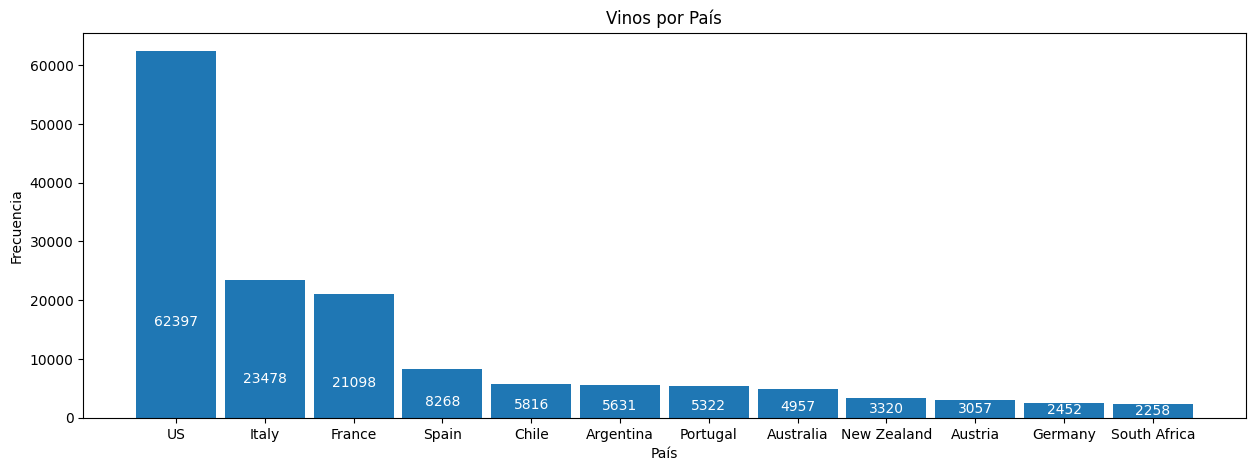

In [116]:
import matplotlib.pyplot as plt
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//4, y[i],color='white', ha = 'center')
plt.subplots(figsize =(15, 5))
plt.bar(countries,frecuencies,width=0.9)
plt.title('Vinos por País')
plt.xlabel('País')
plt.ylabel('Frecuencia')
addlabels(countries, frecuencies)
plt.show()

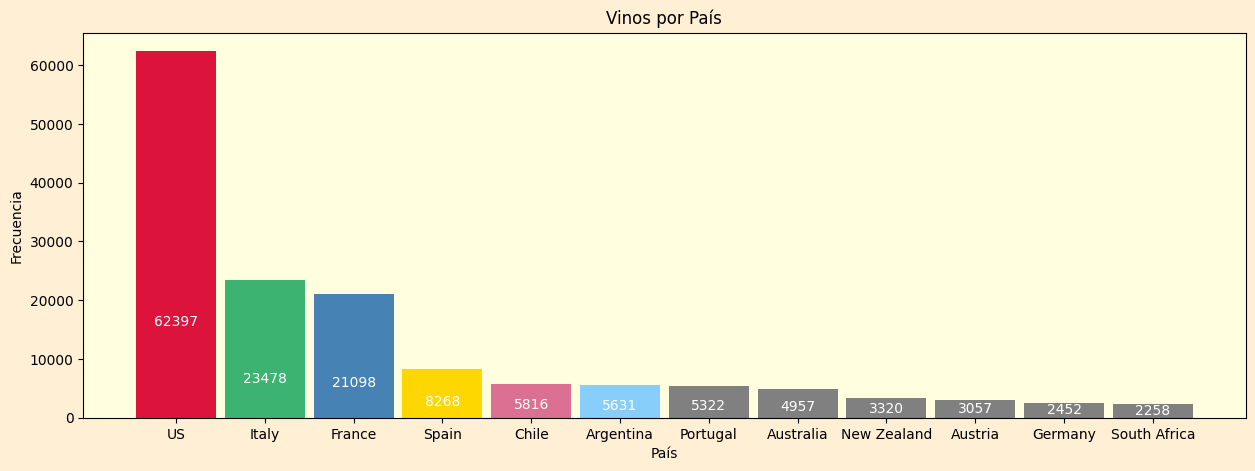

In [117]:
import matplotlib.pyplot as plt
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//4, y[i],color='white', ha = 'center')
fig, ax = plt.subplots(figsize =(15, 5),facecolor='PapayaWhip')
ax.set_facecolor("LightYellow")
plt.bar(countries,frecuencies,color=['Crimson','MediumSeaGreen','SteelBlue','gold','PaleVioletRed','LightSkyBlue']+6*['grey'],width=0.9)
plt.title('Vinos por País')
plt.xlabel('País')
plt.ylabel('Frecuencia')
addlabels(countries, frecuencies)
plt.show()


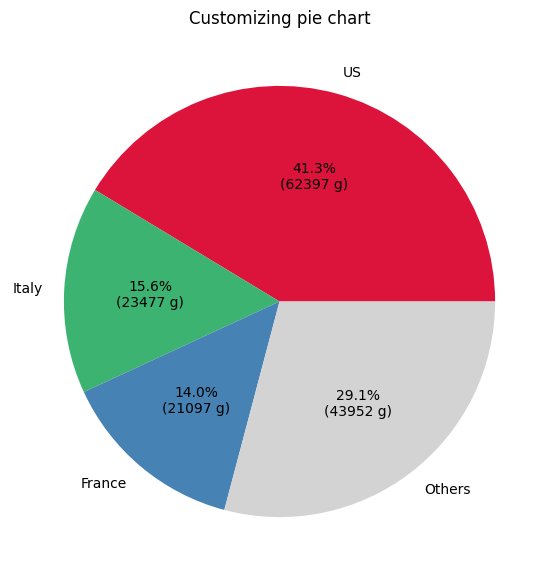

In [118]:
countries6=df.country.value_counts().index[:3]
countriesPie=np.append(countries6,['Others'])
frecuencies6=df.country.value_counts().values[:3]
frecOthers=df.country.value_counts().values[3:].sum()
frecuenciespie=np.append(frecuencies6,[frecOthers])
frecuenciespie
piecolors = ('Crimson','MediumSeaGreen','SteelBlue','lightgrey')
fig,ax = plt.subplots(figsize =(10, 7))
def pcts(pct, values):
    absolute = int(pct / 100.*np.sum(values))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
plt.pie(frecuenciespie, labels = countriesPie,colors=piecolors,autopct = lambda pct: pcts(pct, frecuenciespie))

ax.set_title("Customizing pie chart")
plt.show()

In [119]:
df.country.values

array(['US', 'Spain', 'US', ..., 'Italy', 'France', 'Italy'], dtype=object)

d) ¿ Cuál es el valor máximo de la columna price ?

In [120]:
df.price.max()

2300.0

e) ¿ Cuál es el valor mínimo de la columna price ?

In [121]:
df.price.min()

4.0

f) ¿ Cuál (o cuales) es el vino más caro ?

In [122]:
# most_exp=df.sort_values(by='price').tail(1).values[0][1]
# most_exp=df.set_index('price').sort_index().tail(1).country.values[0]
most_exp=df[df.price==df.price.max()].values[0][1]
# most_exp=df[df.price==df.price.max()].country.values[0]

most_exp

'France'

g) ¿ Cuántos vinos tienen un precio por encima de la media ?

In [123]:
df[df.price>df.price.mean()].country.count()

45371

In [124]:
df['country'].value_counts() #te cuenta la cantidad de ocurrencia de los dintintos valores que puede tomar df['feature'] y los ordena de manera decendente 

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


In [125]:
df['country'].nunique() #cantidad de  valores distintos que hay en la columna

48

In [126]:
df['country'].unique() # lista  de  valores distintos que hay en la columna

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [127]:
#Valor maximo de la columna price

df['price'].max()

2300.0

In [128]:
#valor minimo de la columna price
df['price'].min()

4.0

In [129]:
df[df['price']==4.0] #los vinos mas baratos

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1858,1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties
25645,25645,US,"There's a lot going on in this Merlot, which i...",dato faltante,86,4.0,California,California,California Other,Merlot,Bandit
34415,34415,Spain,This opens with standard cherry and berry arom...,dato faltante,84,4.0,Levante,Yecla,dato faltante,Cabernet Sauvignon,Terrenal
34682,34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,dato faltante,Tempranillo,Terrenal
36716,36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,dato faltante,Malbec-Syrah,Broke Ass
48655,48655,US,"There's a lot going on in this Merlot, which i...",dato faltante,86,4.0,California,California,California Other,Merlot,Bandit
73417,73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,dato faltante,dato faltante,Pinot Grigio,Cramele Recas
80185,80185,US,"There's a lot going on in this Merlot, which i...",dato faltante,86,4.0,California,California,California Other,Merlot,Bandit
90546,90546,Argentina,Clean as anyone should reasonably expect given...,dato faltante,85,4.0,Mendoza Province,Mendoza,dato faltante,Malbec,Toca Diamonte
91766,91766,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,dato faltante,Malbec-Syrah,Broke Ass


In [130]:
min = df['price'].min()
df.loc[(df['price']) == min, :]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1858,1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,California Other,Chardonnay,Pam's Cuties
25645,25645,US,"There's a lot going on in this Merlot, which i...",dato faltante,86,4.0,California,California,California Other,Merlot,Bandit
34415,34415,Spain,This opens with standard cherry and berry arom...,dato faltante,84,4.0,Levante,Yecla,dato faltante,Cabernet Sauvignon,Terrenal
34682,34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,dato faltante,Tempranillo,Terrenal
36716,36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,dato faltante,Malbec-Syrah,Broke Ass
48655,48655,US,"There's a lot going on in this Merlot, which i...",dato faltante,86,4.0,California,California,California Other,Merlot,Bandit
73417,73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,dato faltante,dato faltante,Pinot Grigio,Cramele Recas
80185,80185,US,"There's a lot going on in this Merlot, which i...",dato faltante,86,4.0,California,California,California Other,Merlot,Bandit
90546,90546,Argentina,Clean as anyone should reasonably expect given...,dato faltante,85,4.0,Mendoza Province,Mendoza,dato faltante,Malbec,Toca Diamonte
91766,91766,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,dato faltante,Malbec-Syrah,Broke Ass


In [131]:
#Cuantos vinos hay por encima de la media de los precios
media = df['price'].mean() 

In [132]:
df[df['price']>media]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,dato faltante,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,dato faltante,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150918,150918,France,"Jacquart makes a full-bodied, ripe style of Ch...",Cuvée Mosaïque,92,38.0,Champagne,Champagne,dato faltante,Champagne Blend,Jacquart
150919,150919,France,This classy example opens with a very floral n...,Cuvée President,91,37.0,Champagne,Champagne,dato faltante,Champagne Blend,H.Germain
150921,150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,dato faltante,Champagne Blend,Jacquart
150924,150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,dato faltante,Champagne Blend,Heidsieck & Co Monopole


# Apply

El método apply de los dataframes de pandas, nos permite realizar una acción sobre cada fila o columna (sobre un "axis") del dataset.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

Por ejemplo, queremos crear una nueva columna que se llame "description_len" y contenga la cantidad de caracteres que hay en cada fila de la columna "description".

Primero: Definamos una función que cuente los caracteres de un string:

In [133]:
def count_string_len(string:str) -> int:
 
    """
    La función retorna un número entero con la cantidad de caracteres del string.
    """
    
    cantidad_de_letras = len(string)
    return cantidad_de_letras
  # COMPLETAR

In [134]:
df['description'].apply(count_string_len)

0         355
1         318
2         280
3         386
4         376
         ... 
150925    285
150926    266
150927    397
150928    253
150929    203
Name: description, Length: 150925, dtype: int64

In [135]:
df['description_len'] = df['description'].apply(count_string_len)

In [136]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_len
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,355
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,dato faltante,Tinta de Toro,Bodega Carmen Rodríguez,318
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,280
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,386
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,dato faltante,Provence red blend,Domaine de la Bégude,376


Para utilizar apply, no hace falta definir una función aparte. También podemos hacerlo directamente utilizando funciónes "lambda":

In [137]:
df['description_len'] = df['description'].apply(lambda x: len(x))

In [138]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_len
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,355
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,dato faltante,Tinta de Toro,Bodega Carmen Rodríguez,318
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,280
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,386
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,dato faltante,Provence red blend,Domaine de la Bégude,376


#### Ejercicio: Utilizar una función lambda para crear una nueva columna que se llame float_point y contenga los mismos datos que la columna "points" pero en formato float

In [139]:
df['float_point'] = df['points'].apply(lambda datos: float(datos))

In [140]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_len,float_point
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,355,96.0
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,dato faltante,Tinta de Toro,Bodega Carmen Rodríguez,318,96.0
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,280,96.0
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,386,96.0
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,dato faltante,Provence red blend,Domaine de la Bégude,376,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,dato faltante,91,20.0,Southern Italy,Fiano di Avellino,dato faltante,White Blend,Feudi di San Gregorio,285,91.0
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,dato faltante,Champagne Blend,H.Germain,266,91.0
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,dato faltante,White Blend,Terredora,397,91.0
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,dato faltante,Champagne Blend,Gosset,253,90.0


# Group by


La función group by de pandas, nos permite agrupar dataframes a partir de una o más columnas y mediante funciones de agregación obtener insights de cada grupo.

Veamos ejemplos:

In [141]:
group_by_country = df.groupby('country')

In [142]:
group_by_country

Vemos que groupby nos devuelve un objeto pandas.core.groupby.generic.DataFrameGroupBy.

Sobre este objeto, podemos aplicar directamente funciones de agregación como .count(), .sum(), .mean(), etcétera:

In [143]:
group_by_country.count().head()

,Unnamed: 0,description,designation,points,price,province,region_1,region_2,variety,winery,description_len,float_point
country,,,,,,,,,,,,
Albania,2,2,2,2,2,2,2,2,2,2,2,2
Argentina,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631
Australia,4957,4957,4957,4957,4957,4957,4957,4957,4957,4957,4957,4957
Austria,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057,3057
Bosnia and Herzegovina,4,4,4,4,4,4,4,4,4,4,4,4


In [144]:
group_by_country.mean()

TypeError: agg function failed [how->mean,dtype->object]

¿ Por qué cuando aplicamos la función mean solo nos trae 4 columnas y el indice ?  
  
<span style='color:Peru'>Porque trae las columnas con datos numéricos las demas son strings y solo pueden contarse.</span>

También podemos agrupar por múltiples columnas:

In [ ]:
group_by_country_prov = df.groupby(['country', 'province'])
group_by_country_prov.mean().head()

Unnamed: 0     points      price  \
country   province                                               
Albania   Mirditë            4753.000000  88.000000  20.000000   
Argentina Mendoza Province  80158.115141  86.108182  20.951441   
          Other             84440.971879  85.398200  20.570362   
Australia Australia Other   92211.954792  84.813743  11.770819   
          New South Wales   96444.069106  87.048780  22.139280   

                            description_len  float_point  
country   province                                        
Albania   Mirditë                221.000000    88.000000  
Argentina Mendoza Province       260.281527    86.108182  
          Other                  253.284589    85.398200  
Australia Australia Other        216.408680    84.813743  
          New South Wales        262.414634    87.048780

Y si no queremos que las variables por las que agrupamos se conviertan en indices y sean una columna más, podemos especificarlo en la función:

In [ ]:
group_by_country_prov = df.groupby(['country', 'province'], as_index=False)
group_by_country_prov.sum().head()

,country,province,Unnamed: 0,points,price,description_len,float_point
0,Albania,Mirditë,9506,176,40.000000,442,176.0
1,Argentina,Mendoza Province,380109782,408325,99351.733370,1234255,408325.0
2,Argentina,Other,75068024,75919,18287.051860,225170,75919.0
3,Australia,Australia Other,50993211,46902,6509.262965,119674,46902.0
4,Australia,New South Wales,23725241,21414,5446.262965,64554,21414.0


Finalmente, también podemos aplicar distintas funciones de agregación a cada columna.

EJERCICIO: Averiguar como podemos aplicar una función de agregación distinta a cada columna y:

1) Agrupar el dataset por pais
2) Obtener una columna que tenga el precio medio por país y otra que contenga la sumatoria de puntos. (.mean() y .sum() ).

In [ ]:
help(pd.DataFrame.groupby)

In [148]:
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_len,float_point
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,355,96.0
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,dato faltante,Tinta de Toro,Bodega Carmen Rodríguez,318,96.0


In [153]:
mk=df.groupby(['country'])
mk

In [151]:
group_by_country = df.groupby(['country']).agg({'price': 'mean', 'points': 'sum'})
group_by_country.head(2)


,price,points
country,,
Albania,20.000000,176
Argentina,20.891278,484244


In [ ]:
group_by_country['price']

country
Albania                   20.000000
Argentina                 20.891278
Australia                 31.282284
Austria                   31.556255
Bosnia and Herzegovina    12.750000
Brazil                    19.920000
Bulgaria                  11.545455
Canada                    34.613587
Chile                     19.463304
China                     20.333333
Croatia                   23.784145
Cyprus                    15.483871
Czech Republic            18.000000
Egypt                     33.131482
England                   45.903498
France                    41.883072
Georgia                   18.581395
Germany                   38.759301
Greece                    21.902237
Hungary                   44.156413
India                     13.875000
Israel                    31.362904
Italy                     36.664928
Japan                     24.000000
Lebanon                   25.432432
Lithuania                 10.000000
Luxembourg                40.666667
Macedonia           

# Sort values

Para ordenar un dataframe de pandas, podemos utilizar la función sort_values()

EJERCICIO:

Ordenar el dataset por "points" de manera descendente.

In [ ]:
help(pd.DataFrame.sort_values)

In [ ]:
df.sort_values("points", ascending=False)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,description_len,float_point
137099,137099,US,Tasted in a flight of great and famous Napa wi...,dato faltante,100,200.0,California,Napa Valley,Napa,Cabernet Sauvignon,Cardinale,547,100.0
19354,19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse,334,100.0
84035,84035,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Rutherglen,dato faltante,Muscat,Chambers Rosewood Vineyards,422,100.0
84034,84034,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Walla Walla Valley (OR),Oregon Other,Syrah,Cayuse,334,100.0
122767,122767,US,"A spectacular Pinot Noir, but a very young one...",Litton Estate Vineyard,100,100.0,California,Russian River Valley,Sonoma,Pinot Noir,Williams Selyem,578,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119415,119415,Spain,Vanilla wafer aromas leave this taster lost. T...,Rosado,80,13.0,Northern Spain,Ribera del Duero,dato faltante,Rosé,Prado Rey,251,80.0
119414,119414,France,The problem with this wine is the wood. There ...,dato faltante,80,29.0,Bordeaux,Graves,dato faltante,Bordeaux-style Red Blend,Château Tour de Calens,209,80.0
119413,119413,US,Has extracted pineapple jam flavors and an oak...,Reserve Selection,80,15.0,California,Russian River Valley,Sonoma,Chardonnay,Hayman & Hill,83,80.0
119412,119412,US,"Why not? Because the wine smells like soap, an...",Por que No?,80,25.0,California,Napa Valley,Napa,Red Blend,Tres Sabores,114,80.0
